# Day 7: challenge solutions

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
ds = xr.open_dataset('pH.nc')

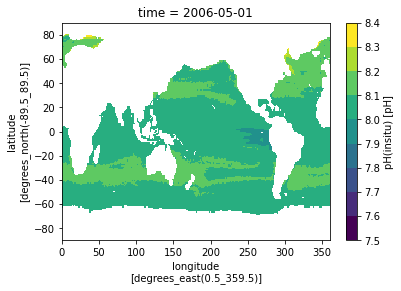

In [12]:
ds.pH.isel(time=100).plot(levels=np.arange(7.5,8.5,0.1))

## 2010 and 1998

In [37]:
# subset annual data
ds_1998 = ds.groupby('time.year').mean().sel(year = 1998)

ds_2010 = ds.groupby('time.year').mean().sel(year = 2010)


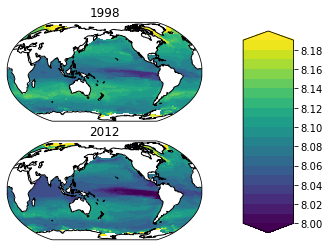

In [38]:
f, axs = plt.subplots(nrows=2,ncols=1,figsize=(14,4),subplot_kw=dict(projection=ccrs.Robinson(central_longitude=180))) 
axs = axs.flatten()

im = axs[0].contourf(ds_1998.lon,ds_1998.lat,ds_1998.pH,
                     transform=ccrs.PlateCarree(),
                     levels=np.arange(8,8.2,0.01),
                     extend='both')
axs[0].coastlines()
axs[0].set_title('1998')

axs[1].contourf(ds_2010.lon,ds_2010.lat,ds_2010.pH,
                transform=ccrs.PlateCarree(),
                levels=np.arange(8,8.2,0.01),
                extend='both')

axs[1].coastlines()
axs[1].set_title('2012')

f.subplots_adjust(right=0.6)
cbar_ax = f.add_axes([0.5, 0.15, 0.05, 0.7])
f.colorbar(im,cax=cbar_ax,fraction=0.046,pad=0.04)

Text(0.5, 1.0, 'DS 2010 - 1998')

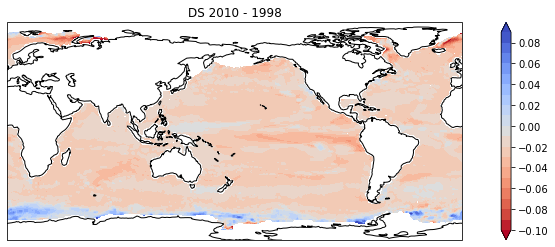

In [46]:
f, axs = plt.subplots(nrows=1,ncols=1,figsize=(14,4),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180))) 

im = axs.contourf(ds_2010.lon,ds_2010.lat,ds_2010.pH-ds_1998.pH,
                     transform=ccrs.PlateCarree(),
                     cmap = 'coolwarm_r',
                     levels=np.arange(-0.1,0.1,0.01),
                     extend='both')
plt.colorbar(im)
axs.coastlines()
axs.set_title('DS 2010 - 1998')

## seasonal example, 2000

In [47]:
ds = ds.sel(time=slice('2000-01-01','2005-01-01')).groupby('time.season').mean()


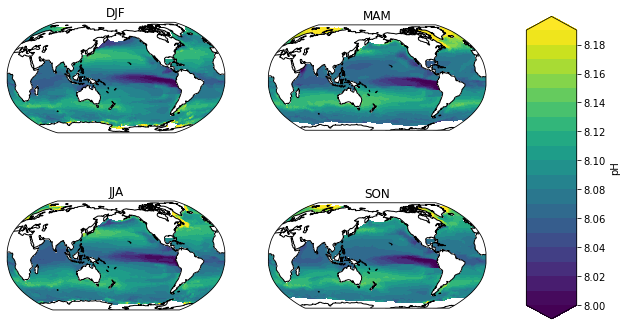

In [50]:
f, axs = plt.subplots(nrows=2,ncols=2,
                      figsize=(14,6),
                      subplot_kw=dict(projection=ccrs.Robinson(central_longitude=180))
                     ) 
axs = axs.flatten()
# f.suptitle('ETHZ and HadISST SST',fontsize=15)

for i in range(0,4):
    im = axs[i].contourf(ds.lon,ds.lat,ds.pH.isel(season=i),
                         transform=ccrs.PlateCarree(),
                         levels=np.arange(8,8.2,0.01),
                         extend='both')
    axs[i].coastlines()

axs[0].set_title('DJF')
axs[1].set_title('MAM')
axs[2].set_title('JJA')
axs[3].set_title('SON')

f.subplots_adjust(right=0.6)
cbar_ax = f.add_axes([0.64, 0.15, 0.05, 0.7])
f.colorbar(im,cax=cbar_ax,fraction=0.046,pad=0.04,label='pH')

## Add a point to the map

In [56]:
lon_buoy = -73.164
lat_buoy = 40.251

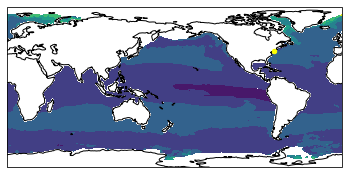

In [57]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) # you can change the central longitude of the map
ax.coastlines()
ax.contourf(ds_1998.lon,ds_1998.lat,ds_1998.pH,transform=ccrs.PlateCarree())

# ax.set_extent([109.5,288.5,-65.5, 65.5]) # solution

ax.scatter(lon_buoy, lat_buoy,
            s=20, # sets the markersize
            color='Yellow', # sets the color
            transform=ccrs.PlateCarree(), # sets the projection!
            zorder = 10 # makes sure that this is plotted above other data!
          )